<div class="alert alert-success" role="alert">
 <h1>Física Computacional </h1>
 <h2>Tarea 1</h2>
 </div>

<img src="./Julia-logo.png" style="height:50px;display:inline">


> Autor: Celeste Castro Granados $\mathbb C \hat{e}l \mathbb s$



## 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:


Importamos primero la biblioteca que utilizaremos para graficar y probar nuestras funciones

In [1]:
using Plots #Biblioteca para graficar

### a)  Encuentre una expresión para la segunda derivada numérica de orden 4 con malla uniforme. (Se desprecian términos $h^5$ en la serie de Taylor).

Vamos a obtener la 2nda derivada de una función en el punto $x_i$ con una precisión en la que se desprecian términos en $h^5$, es decir, tenemos que realizar operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica (orden 4). Los puntos van a estar siempre separados por una distancia h porque se trata de una malla uniforme.

Por lo tanto, partimos de las siguientes ecuaciones (expansiones en serie de Taylor):

$$ f(x_0+h) = f(x_0) + f'(x_0)h + \frac{f''(x_0) h^2}{2} + \frac{f'''(x_0) h^3}{3!} + \frac{f^{iv} (x_0) h^4}{4!} + \theta (h^5) \quad...(1)$$
$$ f(x_0-h) = f(x_0) - f'(x_0)h + \frac{f''(x_0) h^2}{2} - \frac{f'''(x_0) h^3}{3!} + \frac{f^{iv} (x_0) h^4}{4!} + \theta (h^5)\quad...(2) $$
$$ f(x_0+2h) = f(x_0) + 2f'(x_0)h + 2f''(x_0) h^2 + \frac{4f'''(x_0) h^3}{3} + \frac{2f^{iv} (x_0) h^4}{3} + \theta (h^5) \quad...(3)$$
$$ f(x_0-2h) = f(x_0) - 2f'(x_0)h + 2f''(x_0) h^2 - \frac{4f'''(x_0) h^3}{3} + \frac{2f^{iv} (x_0) h^4}{3} + \theta (h^5) \quad...(4) $$

Sumamos las ecuaciones (1)-(2) y (3)-(4) y obtenemos lo siguiente:


$$ f(x_0+h) + f(x_0 - h) = 2f(x_0) + f''(x_0) h^2 + \frac{1}{12} f^{iv} (x_0) h^4 + \theta (h^5) \quad...(5)$$
$$ f(x_0+2h) + f(x_0 - 2h) = 2f(x_0) + 4f''(x_0) h^2 + \frac{4}{3} f^{iv} (x_0) h^4 + \theta (h^5) \quad...(6)$$


Así, podemos hacer 16Eq(5) - Eq(6):


$$ 16 f_{i+1} + 16 f_{i-1} - f_{i+2} - f_{i-2} = 30 f_i + 12 f''_i h^2 $$

Por lo que, la expresión para la segunda derivada numérica de orden 4 en una malla uniforme es: 


$$ f''(x_i) = \frac{1}{12h^2} \bigg ( 16 f_{i+1} + 16 f_{i-1} - f_{i+2} - f_{i-2} - 30 f_i \bigg ) $$ 


Observamos que la expresión anterior no puede ser aplicada en los puntos extremos. Para calcular la derivada en los extremos necesitamos las expresiones para $x_0+h$ , $x_0+2h$, $x_0+3h$ y $x_0+4h$. Estas expresiones podemos escribirlas como el siguiente sistema de ecuaciones:

$$\begin{bmatrix} 1 & 1/2! & 1/3! & 1/4! \\ 2 & 2 & 4/3 & 2/3 \\ 3 & 9/2 & 9/2 & 27/8 \\ 4 & 8 & 32/3 & 32/3 \end{bmatrix} \begin{bmatrix} h f_i' \\ h^2 f_i'' \\ h^3 f_i ''' \\ h^4 f_i^{(iv)} \end{bmatrix} = \begin{bmatrix} f_{i+1} - f_i \\ f_{i+2}-f_i \\ f_{i+3} - f_i \\ f_{i+4}-f_i \end{bmatrix}$$

$\therefore$ La solución para $f_i''$ es la solución del segundo nivel y es la siguiente:


$$ f''(x_i)= \frac{\frac{35}{12} f_i -\frac{26}{3} f_{i+1} + \frac{19}{2} f_{i+2} - \frac{14}{3} f_{i+3} + \frac{11}{12} f_{i+4} }{h^2} $$


Para el primer punto se evalúa en $i=1$ y para el último en $i=end$, considerando que:

$i+1 \rightarrow i-1, i+2 \rightarrow i-2, i+3 \rightarrow i-3, i+4 \rightarrow i-4$ y h$\rightarrow$ -h. 

A continuación, procedemos a programar este algoritmo. 


In [2]:
function deriv2num_h5(f,x) 
    f_2prima = zeros(length(f)) #vector de ceros del mismo tamaño que f, lo vamos a llenar
    h = x[2] - x[1] #Los puntos siempre van a estar separados la distancia que haya entre el 1er y 2ndo elemento de x porque todos son equidistantes. (Malla uniforme)
    doceh2 = 12*(h^2)
    for i in 3:(length(f)-2) #el for corre sobre este intervalo ya que no estamos considerando los puntos extremos: 2 al inicio y 2 al final
        f_2prima[i] = ( 16*(f[i+1]+ f[i-1]) - f[i+2] - f[i-2] - 30f[i] )/(doceh2)
    end
    #Calculo de los puntos extremos
    #definimos los coeficientes
    c0,c1,c2,c3,c4 = 35/12,-26/3,19/2,-14/3,11/12
    #calculo del primer punto
    f_2prima[1] = ( c0*f[1] + c1*f[2] + c2*f[3] + c3*f[4] + c4*f[5] )/h^2
    # calculo del segundo punto
    f_2prima[2] = ( c0*f[2] + c1*f[3] + c2*f[4] + c3*f[5] + c4*f[6] )/h^2
    # calculo del ultimo punto o el punto N
    f_2prima[end] = ( c0*f[end] + c1*f[end-1] + c2*f[end-2] + c3*f[end-3] + c4*f[end-4] )/h^2
    # calculo del penultimo punto o el N-1
    f_2prima[end-1] = ( c0*f[end-1] + c1*f[end-2] + c2*f[end-3] + c3*f[end-4] + c4*f[end-5] )/h^2
    return f_2prima
end


deriv2num_h5 (generic function with 1 method)

A continuación probaremos nuestra función.

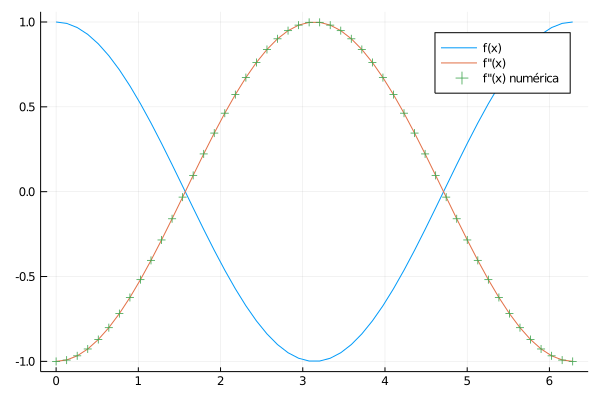

In [3]:
x = collect(range(0,stop=2π,length=50))
y = cos.(x)
y_2deriv = -cos.(x)
y_num_2deriv = deriv2num_h5(y,x)
plot(x,y,label="f(x)")
plot!(x,y_2deriv,label="f''(x)")
scatter!(x,y_num_2deriv,label="f''(x) numérica",m=:cross)

### b) Encuentre una expresión para la derivada numérica de 2ndo orden para una malla no uniforme. (Se desprecian términos $h^3$ en la serie de Taylor).

En este caso, vamos a obtener la derivada de una función en el punto $x_0$ pero con una precisión en la que se desprecian términos en $h^3$, i.e. tenemos que realizar operaciones sólo con un punto a la izquierda y uno a la derecha para una expresión simétrica (orden 2). Sin embargo, como se trata de una malla no uniforme, los puntos no estan a la misma distancia h como en el inciso anterior. Suponemos un punto a la izquierda de x_0 a distancia $h_1$ y uno a la derecha a distancia $h_2$.

Por lo tanto, partimos de las siguientes dos ecuaciones:

$$f(x_0-h_1)=f(x_0)-f'(x_0)h_1 + \frac{1}{2}f''(x_0)h_1^2 + \theta(h^3)\quad...(7)$$
$$f(x_0+h_2)=f(x_0)+f'(x_0)h_2 + \frac{1}{2}f''(x_0)h_2^2 + \theta(h^3)\quad...(8)$$

Así, podemos hacer $h_1^2$Eq(8) y $h_2^2$Eq(7) y obtenemos:

$$ h_2^2f(x_0-h_1)=h_2^2f(x_0)-f'(x_0)h_1h_2^2 + \frac{1}{2}f''(x_0)h_1^2h_2^2 + \theta(h^3)\quad...(9) $$
$$ h_1^2f(x_0+h_2)=h_1^2f(x_0)+f'(x_0)h_1^2h_2 + \frac{1}{2}f''(x_0)h_2^2h_1^2 + \theta(h^3)\quad...(10) $$

Restamos las ecuaciones (10)-(9):

$$ h_1^2f(x_0+h_2)-h_2^2f(x_0-h_1)=f(x_0)(h_1^2-h_2^2)+ f'(x_0)[h_1^2h_2+h_1h_2^2] $$ 

Por lo que, la expresión para la derivada numérica de orden 2 en una malla no uniforme es:

$$ f'(x_0)=\frac{h_1^2f(x_0+h_2)-h_2^2f(x_0-h_1)-f(x_0)(h_1^2-h_2^2)}{h_1^2h_2+h_1h_2^2} $$

Y recordando que supusimos que el punto a la izquierda de $x_0$ era el que estaba a distancia $h_1$ y el punto a la derecha a distancia $h_2$:

$$ \Rightarrow f'_i=\frac{h_1^2f_{i+1}-h_2^2f_{i-1}-f_i(h_1^2-h_2^2)}{h_1^2h_2+h_1h_2^2} $$ 

Ahora, observamos que la expresión anterior no puede ser aplicada en los puntos extremos. Para calcular la derivada en los extremos necesitamos las expresiones para $x_0+h_1$ y $x_0+h_2$. Estas expresiones podemos escribirlas como el siguiente sistema de ecuaciones:

$$\begin{bmatrix} h_1 & \frac{1}{2}h_1^2   \\ h_2 & \frac{1}{2}h_2^2 \\ \end{bmatrix} \begin{bmatrix} f'(x_0) \\ f''(x_0) \end{bmatrix} = \begin{bmatrix} f(x_0+h_1)-f(x_0) \\ f(x_0+h_2)-f(x_0)   \end{bmatrix} $$

$\therefore$ La solución para $f(x_0)'$ es la solución del primer nivel y es la siguiente:

$$ f'(x_0)=\frac{h_2^2 \big (f(x_0+h_1)-f(x_0) \big )-h_1^2 \big (f(x_0 + h_2)-f(x_0) \big )}{h_1h_2^2-h_1^2h_2} $$

$$ \Rightarrow f'(x_0)=\frac{h_2^2 f(x_0+h_1)- h_2^2f(x_0)-h_1^2 f(x_0 + h_2)+ h_1^2 f(x_0)}{h_1h_2^2-h_1^2h_2} $$

En donde, para el primer punto se evalúa en $i=1$ y se tiene que $h_1$ corresponde a la distancia entre el primer y segundo punto, y $h_2$ a la distancia entre el primer y el 3er punto. ($i+1$ y $i+2$)

Por lo que, la expresión para el primer punto es la siguiente:

$$  f'_1=\frac{h_2^2 f_2- h_2^2f_1-h_1^2 f_3+ h_1^2 f_1}{h_1h_2^2-h_1^2h_2}$$

Y para el último punto, se evalúa en $i=end$ y se tiene que $h_1$ corresponde a la distancia entre el último y el penúltimo punto, y $h_2$ a la distancia entre el último y el antepenúltimo punto. Por lo que, hay que realizar el siguiente cambio: $i+1 \rightarrow i-1, i+2 \rightarrow i-2$, y considerar un cambio de signo a todo. 

Por lo tanto, la expresión para el último punto es la siguiente:

$$ f'_{end}=- \bigg ( \frac{h_2^2 f_{end-1}- h_2^2f_{end}-h_1^2 f_{end-2}+ h_1^2 f_{end}}{h_1h_2^2-h_1^2h_2} \bigg )$$

A continuación, procedemos a programar este algoritmo. 

In [4]:
function derivnum_h3(f,x)
    f_prima = zeros(length(f)) #vector de ceros del mismo tamaño que f, lo vamos a llenar
    for i in 2:(length(x)-1) #el for corre sobre este intervalo ya que no estamos considerando los puntos extremos
        h1=x[i]-x[i-1] #h1 es la distancia entre el punto i y el punto a la izquierda
        h2=x[i+1]-x[i] #h2 es la distancia entre el punto i y el punto a la derecha
        f_prima[i]= (((h1^2)*f[i+1]-(h2^2)*f[i-1])-(f[i]*((h1^2)-(h2^2))))/(((h1^2)*h2)+(h1*(h2^2)))
    end
    #Calculo de los extremos
    #calculo del primer punto
   
    hder1=x[2]-x[1] #Para el primer punto, los dos puntos que va a consideran van a ser los dos a la derecha
    hder2=x[3]-x[1]
   
    f_prima[1]=(((hder2^2)*f[2])-((hder2^2)*f[1])-((hder1^2)*f[3])+((hder1^2)*f[1]))/((hder1*(hder2^2))-((hder1^2)*hder2))
   
    #calculo del ultimo punto
   
    hizq1=x[end]-x[end-1] ##Para el ultimo punto, los dos puntos que va a consideran van a ser los dos a la izquierda
    hizq2=x[end]-x[end-2]
   
    f_prima[end]=-(((hizq2^2)*f[end-1])-((hizq2^2)*f[end])-((hizq1^2)*f[end-2])+((hizq1^2)*f[end]))/((hizq1*(hizq2^2))-((hizq1^2)*hizq2))
   
    return f_prima
end

derivnum_h3 (generic function with 1 method)

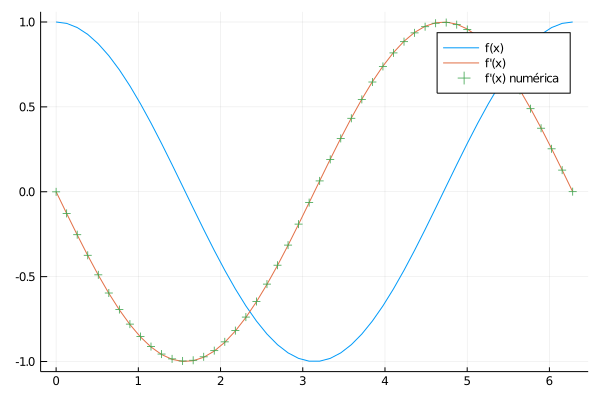

In [5]:
x = collect(range(0,stop=2π,length=50))
y = cos.(x)
y_deriv = -sin.(x)
y_num_deriv = derivnum_h3(y,x)
plot(x,y,label="f(x)")
plot!(x,y_deriv,label="f'(x)")
scatter!(x,y_num_deriv,label="f'(x) numérica",m=:cross)

### c) Encuentre una expresión para la segunda derivada numérica de 2do orden con malla no uniforme. (Se desprecian términos $h^3$ en la serie de Taylor).


Vamos a obtener la derivada de una función en el punto $x_0$ con una precisión en la que se desprecian términos en $h^3$, i.e. tenemos que realizar operaciones sólo con un punto a la izquierda y uno a la derecha para una expresión simétrica (orden 2). Al igual que en el inciso anterior, se trata de una malla no uniforme, por lo que, suponemos un punto a la izquierda a distancia $h_1$ y uno a la derecha a distancia $h_2$.

Por lo tanto, podemos partir de las mismas dos ecuaciones que en b):

$$ f(x_0-h_1)=f(x_0)-f'(x_0)h_1 + \frac{1}{2}f''(x_0)h_1^2 + \theta(h^3)\quad...(7) $$
$$ f(x_0+h_2)=f(x_0)+f'(x_0)h_2 + \frac{1}{2}f''(x_0)h_2^2 + \theta(h^3)\quad...(8) $$

Asi, podemos hacer $h_1$Eq(8) y $h_2$Eq(7), y obtenemos:

$$ h_2f(x_0-h_1)=h_2f(x_0)-f'(x_0)h_1h_2 + \frac{1}{2}f''(x_0)h_1^2h_2 + \theta(h^3)\quad...(11) $$
$$ h_1f(x_0+h_2)=h_1f(x_0)+f'(x_0)h_1h_2 + \frac{1}{2}f''(x_0)h_1h_2^2 + \theta(h^3)\quad...(12) $$

Sumamos las ecuaciones (11) y (12):

$$ h_2f(x_0-h_1)+h_1f(x_0+h_2)=f(x_0)(h_1+h_2)+ \frac{1}{2}f''(x_0)[h_1h_2^2+h_1^2h_2] $$

Por lo que, la expresión para la segunda derivada numérica de orden 2 en una malla no uniforme es:

$$ f''(x_0)= 2 \bigg (\frac{h_2f(x_0-h_1)+h_1f(x_0+h_2)-f(x_0)(h_1+h_2)}{[h_1h_2^2+h_1^2h_2]} \bigg) $$

Y recordando que supusimos que el punto a la izquierda de $x_0$ era el que estaba a distancia $h_1$ y el punto a la derecha a distancia $h_2$:

$$ \Rightarrow f''_i = 2 \bigg (\frac{h_2f_{i-1}+h_1f_{i+1}-f_i(h_1+h_2)}{[h_1h_2^2+h_1^2h_2]} \bigg ) $$


Ahora, observamos que la expresión anterior no puede ser aplicada en los puntos extremos. Para calcular la derivada en los extremos, como estamos en orden 2 al igual que en el inciso b), tenemos el mismo sistema de ecuaciones:

$$\begin{bmatrix} h_1 & \frac{1}{2}h_1^2   \\ h_2 & \frac{1}{2}h_2^2 \\ \end{bmatrix} \begin{bmatrix} f'(x_0) \\ f''(x_0) \end{bmatrix} = \begin{bmatrix} f(x_0+h_1)-f(x_0) \\ f(x_0+h_2)-f(x_0)   \end{bmatrix} $$

$\therefore$ La solución para $f(x_0)''$ es la solución del segundo nivel y es la siguiente:

$$f''(x_0)=2 \bigg (\frac{h_1 \big (f(x_0+ h_2)-f(x_0) \big )-h_2 \big (f(x_0+h_1)-f(x_0) \big )}{h_1h_2^2-h_1^2h_2} \bigg )$$

$$\Rightarrow f''(x_0)=2\bigg ( \frac{h_1f(x_0 + h_2)-h_2f(x_0+h_1) +f(x_0)(h_2-h_1)}{h_1h_2^2-h_1^2h_2} \bigg )$$

En donde, para el primer punto se evalúa en $i=1$ y se tiene que $h_1$ corresponde a la distancia entre el primer y segundo punto, y $h_2$ a la distancia entre el primer y el 3er punto. ($i+1$ y $i+2$)

Por lo que, la expresión para el primer punto es la siguiente:

$$ f''_1=2\bigg ( \frac{h_1f_3-h_2f_2 +f_1(h_2-h_1)}{h_1h_2^2-h_1^2h_2} \bigg )$$

Y para el último punto, se evalúa en $i=end$ y se tiene que $h_1$ corresponde a la distancia entre el último y el penúltimo punto, y $h_2$ a la distancia entre el último y el antepenúltimo punto. Por lo que, hay que realizar el siguiente cambio: $i+1 \rightarrow i-1, i+2 \rightarrow i-2$. 

Por lo tanto, la expresión para el último punto es la siguiente:

$$ f''_{end}=2\bigg ( \frac{h_1f_{end-2}-h_2f_{end-1} +f_{end}(h_2-h_1)}{h_1h_2^2-h_1^2h_2} \bigg )$$

A continuación procedemos a programar este algoritmo. 

In [6]:
function deriv2num_h3(f,x)
    f_2prima = zeros(length(f))
    for i in 2:(length(f)-1)
        h1=x[i]-x[i-1] #h1 es la distancia entre el punto i y el punto a la izquierda
        h2=x[i+1]-x[i] #h2 es la distancia entre el punto i y el punto a la derecha
        f_2prima[i] = 2*( ((h2*f[i-1])+(h1*f[i+1])-(f[i]*(h1+h2)))/((h1*(h2^2))+((h1^2)*h2)) )
    end
    #Calculo de los extremos
    #calculo del primer punto
    
    hder1=x[2]-x[1] #Para el primer punto, los dos puntos que va a consideran van a ser los dos a la derecha 
    hder2=x[3]-x[1]
    
    f_2prima[1] = 2*( ((hder1*f[3])-(hder2*f[2])+(f[1]*(hder2-hder1)))/((hder1*(hder2^2))-((hder1^2)*hder2)) )
    
    #calculo del ultimo punto
    
    hizq1=x[end]-x[end-1] ##Para el ultimo punto, los dos puntos que va a consideran van a ser los dos a la izquierda
    hizq2=x[end]-x[end-2]
    
    f_2prima[end] = 2*( ((hizq1*f[end-2])-(hizq2*f[end-1])+(f[end]*(hizq2-hizq1)))/((hizq1*(hizq2^2))-((hizq1^2)*hizq2)) ) 
    
    return f_2prima   
end

deriv2num_h3 (generic function with 1 method)

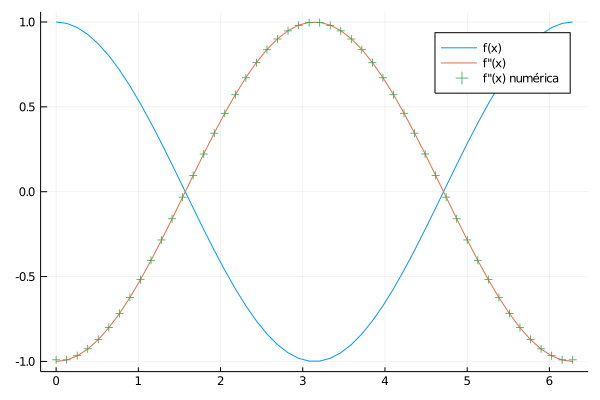

In [7]:
x = collect(range(0,stop=2π,length=50))
y = cos.(x)
y_2deriv = -cos.(x)
y_num_2deriv = deriv2num_h3(y,x)
plot(x,y,label="f(x)")
plot!(x,y_2deriv,label="f''(x)")
scatter!(x,y_num_2deriv,label="f''(x) numérica",m=:cross)

## 2. Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cada uno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

Importamos primero la biblioteca que utilizaremos para medir tiempos. 

In [8]:
using BenchmarkTools

Ahora, las funciones que programamos en el problema anterior, calculan la primera o segunda derivada de una función de manera numérica, por lo que, podemos escoger cualquier función para probar el tiempo que se tarda. Escogemos sin(x). 

### a) Segunda derivada numérica de orden 4.

In [9]:
x = collect(1:1:500) #Definimos una malla con 500 puntos  
y = sin.(x) #Funcion a la cual le vamos a calcular la derivada para cada punto
println("Número de puntos: ",length(x))
@benchmark deriv2num_h5(y,x)


Número de puntos: 500


BenchmarkTools.Trial: 
  memory estimate:  4.06 KiB
  allocs estimate:  1
  --------------
  minimum time:     1.160 μs (0.00% GC)
  median time:      2.490 μs (0.00% GC)
  mean time:        4.684 μs (13.65% GC)
  maximum time:     525.310 μs (96.15% GC)
  --------------
  samples:          10000
  evals/sample:     10

$\therefore$ El tiempo promedio es 4.684 $\mu$s. 

### b) Derivada numérica de orden 2 con malla no uniforme.

In [10]:
#Construimos una malla no uniforme de 500 puntos
x_a = collect(1:2:500) #De 1 a 500 en pasos de 2
x_b = collect(501:1:750) #De 501 a 750 en pasos de 1
x = vcat(x_a,x_b) #malla compuesta  
y = sin.(x) #Funcion a la cual le vamos a calcular la derivada para cada punto
println("Número de puntos: ",length(x))
@benchmark derivnum_h3(y,x)

Número de puntos: 500


BenchmarkTools.Trial: 
  memory estimate:  4.06 KiB
  allocs estimate:  1
  --------------
  minimum time:     2.200 μs (0.00% GC)
  median time:      3.850 μs (0.00% GC)
  mean time:        5.698 μs (9.53% GC)
  maximum time:     553.813 μs (99.12% GC)
  --------------
  samples:          10000
  evals/sample:     8

$\therefore$ El tiempo promedio es 5.698 $\mu$s. 

### c) Segunda derivada numérica de orden 2 con malla no uniforme.

In [11]:
#Construimos una malla no uniforme de 500 puntos
x_a = collect(1:2:500) #De 1 a 500 en pasos de 2
x_b = collect(501:1:750) #De 501 a 750 en pasos de 1
x = vcat(x_a,x_b) #malla compuesta  
y = sin.(x) #Funcion a la cual le vamos a calcular la derivada para cada punto
println("Número de puntos: ",length(x))
@benchmark deriv2num_h3(y,x)

Número de puntos: 500


BenchmarkTools.Trial: 
  memory estimate:  4.06 KiB
  allocs estimate:  1
  --------------
  minimum time:     2.475 μs (0.00% GC)
  median time:      3.525 μs (0.00% GC)
  mean time:        4.633 μs (8.11% GC)
  maximum time:     551.100 μs (99.12% GC)
  --------------
  samples:          10000
  evals/sample:     8

$\therefore$ El tiempo promedio es 4.633 $\mu$s. 

### Ventajas y desventajas de cada una las funciones antes mencionadas.

Para el caso de la segunda derivada tenemos las funciones definidas en a) y c), observamos que la de a) tiene 2 órdenes más de precisión y además es casi igual de rápida que la de c), por lo tanto, presenta dos ventajas sobre ésta ya que es mucho más eficiente, sin embargo, su algoritmo fue el más complicado de todos y sólo funciona para mallas uniformes. Luego, por su parte, el algoritmo de c) presenta la ventaja de que es mucho más rápido de programar debido a que el sistema de ecuaciones que se tuvo que resolver para encontrar la expresión era mucho más sencillo. Asimismo, incluye mallas no uniformes, por lo que se trata de un caso más general que el de a).

Por otro lado, en el caso de la primera derivada tenemos la función definida en b), en este caso, aunque es el algoritmo más lento de los 3, tampoco podemos decir que se tarde mucho más que los otros, además es rápido de programar y considera mallas no uniformes al igual que el de c).

## 3. Calcule la derivada analítica de las funciones $f(x)=e^{-x^2} \sin(10x)$ con $x \in [-5,5]$ y, $g(x)=-\frac{2}{x^6} + \frac{1}{x^{12}}$ con $x \in [0.5,5]$. Realice las gráficas de las funciones y sus primeras dos derivadas. Con las funciones del problema 1, encuentre una malla adecuada para cada caso en el que el error de cálculo sea menor que $10^{−5}$ para cualquier punto. ¿Las mallas tienen el mismo espacio entre puntos de la malla?, explique porque si o porque no.

### Cálculo de la derivada analítica de f(x) en $x \in [-5,5]$ y gráfica de dicha función y sus primeras dos derivadas.

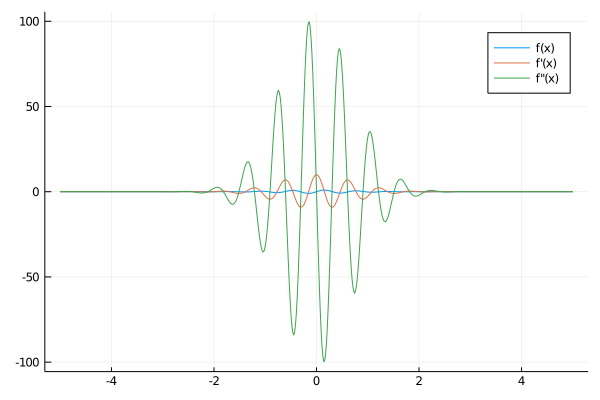

In [12]:
x1=collect(range(-5,stop=5,length=600)) #intervalo de la x: de -5 a 5
f=exp.(-(x1.^2)).*sin.(10*x1) #definicion de f
df= (2*exp.(-(x1.^2))).*((5*cos.(10*x1)) - (x1.*sin.(10*x1))) #derivada analítica de f
d2f= (exp.(-(x1.^2))).*(((2*((2*(x1.^2)).-51)).*(sin.(10*x1))).-((40*x1).*cos.(10*x1))) #segunda derivada analítica de f

plot(x1,f,label="f(x)") #Grafica de f
plot!(x1,df,label="f'(x)") #Grafica de f'
plot!(x1,d2f,label="f''(x)") #Grafica de f''

### Cálculo de la derivada analítica de g(x) en $x \in [0.5,5]$ y gráfica de dicha función y sus primeras dos derivadas.

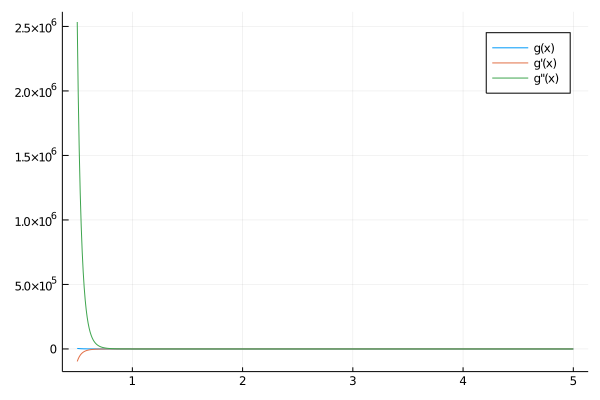

In [13]:
x2=collect(range(0.5,stop=5,length=500)) #intervalo de las x: de 0.5 a 5
g = -2*((x2.^6).^(-1)) + 1*((x2.^(12)).^(-1)) #definicion de g
dg = (12*(x2.^(6).-1)).*(x2.^(-13)) #derivada analítica de g 
d2g =(-84*(x2.^6).+156).*(x2.^(-14)) #segunda derivada analítica de g

plot(x2,g,label="g(x)") #Grafica de g
plot!(x2,dg,label="g'(x)") #Grafica de g'
plot!(x2,d2g,label="g''(x)") #Grafica de g''

### Mallas adecuadas para cada caso en el que el error de cálculo sea menor que $10^{-5}$ para cualquier punto con las funciones del problema  1.

Variamos el tamaño del paso o la longitud del collect hasta encontrar el adecuado. (Solo pondremos el código de la malla adecuada)

**a) Segunda derivada de orden 4 para malla uniforme.**

$f(x)=e^{-x^2} \sin(10x)$:

In [14]:
#Funcion f(x)
x1 = collect(range(-5,stop=5,length=1949)) #intervalo de la x: de -5 a 5
f=exp.(-(x1.^2)).*sin.(10*x1) #definicion de f
d2f= (exp.(-(x1.^2))).*(((2*((2*(x1.^2)).-51)).*(sin.(10*x1))).-((40*x1).*cos.(10*x1))) #segunda derivada analítica de f

y2_h5 = deriv2num_h5(f,x1) #segunda derivada numérica de orden 4 de f(x)

println("Error con h5 = " , maximum(abs.(d2f-y2_h5)) ) #Imprime el error maximo entre y2_h5 y d2f

Error con h5 = 9.986767992131718e-6


$\therefore$ La malla adecuada para que el error sea menor a $10^{-5}$ es: `x1 = collect(range(-5,stop=5,length=1949))`

$g(x)=-\frac{2}{x^6} + \frac{1}{x^{12}}$:

In [15]:
#Funcion g(x)
x2=collect(range(0.5,stop=5,length=90000)) #intervalo de las x: de 0.5 a 5
g = -2*((x2.^6).^(-1)) + 1*((x2.^(12)).^(-1)) #definicion de g
d2g =(-84*(x2.^6).+156).*(x2.^(-14)) #segunda derivada analítica de g

y2_h5 = deriv2num_h5(g,x2) #segunda derivada numérica de orden 4 de g(x)

println("Error con h5 = " , maximum(abs.(d2g-y2_h5)) ) #Imprime el error maximo entre y2_h5 y d2g

Error con h5 = 0.029770204797387123


En este caso, observamos que el mínimo error que pudimos conseguir con nuestro algoritmo fue del orden de $10^{-2}$, ésto debido a que la función g(x) a diferencia de la f(x) tiene un comportamiento extraño justo en el intervalo que estamos considerando, como podemos apreciar en la gráfica que está al incio de este problema, ya que, específicamente cerca del 0.5 su segunda derivada diverge. Y como, en este algoritmo se considera la serie de Taylor despreciando términos de $h^5$, podemos concluir que esa precisión no es suficiente para este caso. 

**b) Derivada de orden 2 para malla no uniforme**

$f(x)=e^{-x^2} \sin(10x)$:

In [16]:
#Funcion f(x)
#Construimos una malla no uniforme
x_a=collect(-5:0.00002:-4)
x_b=collect(-4.1:0.0001:5)
x1=vcat(x_a,x_b)
f=exp.(-(x1.^2)).*sin.(10*x1) #definicion de f
df= (2*exp.(-(x1.^2))).*((5*cos.(10*x1)) - (x1.*sin.(10*x1))) #derivada analítica de f
y_h3 = derivnum_h3(f,x1) #derivada numérica de orden 2 de f(x)

println("Error con h3 = " , maximum(abs.(df-y_h3)) ) #Imprime el error maximo entre y_h3 y df

Error con h3 = 1.7666665641513646e-6


$\therefore$ La malla adecuada para que el error sea menor a $10^{-5}$ es: `

`x_a=collect(-5:0.00002:-4)
x_b=collect(-4.1:0.0001:5)
x1=vcat(x_a,x_b)`

$g(x)=-\frac{2}{x^6} + \frac{1}{x^{12}}$:

In [17]:
#Funcion g(x)
#Construimos una malla no uniforme
x_a= collect(0.5:0.000001:4)
x_b= collect(3.9:0.0000001:5)
x2= vcat(x_a,x_b)
g = -2*((x2.^6).^(-1)) + 1*((x2.^(12)).^(-1)) #definicion de g
dg = (12*(x2.^(6).-1)).*(x2.^(-13)) #derivada analítica de g
y_h3 = derivnum_h3(g,x2) #derivada numérica de orden 2 de g(x)

println("Error con h3 = " , maximum(abs.(dg-y_h3)) ) #Imprime el error maximo entre y_h3 y dg

Error con h3 = 2.405313716735691e-5


$\therefore$ La malla adecuada para que el error sea del orden de $10^{-5}$ es:

`x_a= collect(0.5:0.000001:4)
x_b= collect(3.9:0.0000001:5)
x2= vcat(x_a,x_b)`

**c) Segunda derivada de orden 2 para malla no uniforme**

$f(x)=e^{-x^2} \sin(10x)$:

In [18]:
#Funcion f(x)
#Construimos una malla no uniforme
x_a= collect(-5:0.00004:-4)
x_b= collect(-4.1:0.00005:5)
x1= vcat(x_a,x_b)
f=exp.(-(x1.^2)).*sin.(10*x1) #definicion de f
d2f= (exp.(-(x1.^2))).*(((2*((2*(x1.^2)).-51)).*(sin.(10*x1))).-((40*x1).*cos.(10*x1))) #segunda derivada analítica de f

y2_h3 = deriv2num_h3(f,x1) #segunda derivada numérica de orden 2 de f(x)

println("Error con h3 = " , maximum(abs.(d2f-y2_h3)) ) #Imprime el error maximo entre y2_h3 y d2f 

Error con h3 = 2.4968137068981378e-6


$\therefore$ La malla adecuada para que el error sea menor a $10^{-5}$ es: `

`x_a= collect(-5:0.00004:-4)
x_b= collect(-4.1:0.00005:5)
x1= vcat(x_a,x_b)`

$g(x)=-\frac{2}{x^6} + \frac{1}{x^{12}}$:

In [19]:
# Funcion g(x)
#Construimos una malla no uniforme
x_a=collect(range(0.5,stop=1.1,length=1000000))
x_b=collect(range(1,stop=5,length=1000))
x2 = vcat(x_a,x_b)
g = -2*((x2.^6).^(-1)) + 1*((x2.^(12)).^(-1)) #definicion de g
d2g =(-84*(x2.^6).+156).*(x2.^(-14)) #segunda derivada analítica de g

y2_h3 = deriv2num_h3(g,x2) #segunda derivada numérica de orden 2 de g(x)

println("Error con h3 = " , maximum(abs.(d2g-y2_h3)) ) #Imprime el error maximo entre y2_h3 y d2g 

Error con h3 = 40.85346962371841


En este caso, observamos que no pudimos conseguir un error de $10^{-5}$, ésto debido a las mismas razones planteadas en el inciso a) ya que también estamos obteniendo la segunda derivada de g(x). Sin embargo, a diferencia de a), el error en este caso es del orden de $10^2$, ya que se trata de un algoritmo de orden 2, es decir, estamos despreciando términos del orden de $h^3$, y por tanto, su precisión se reduce todavía más en comparación con el algoritmo de a).

### ¿Las mallas tienen el mismo espacio entre puntos de la malla?, explique porque si o porque no.

Las mallas no siempre tienen el mismo espacio entre sus puntos, recordemos que en el inciso a) el algoritmo fue programado pensando en mallas uniformes por lo que en dicho caso, si se utilizó una malla uniforme. Sin embargo, para los incisos b) y c), los algoritmos fueron pensados para mallas no uniformes, y justamente, en esos casos, encontramos mallas no uniformes. Es importante mencionar que a pesar de que en la mayoría de los casos, si encontramos la malla adecuada para que el error fuera de $10^{-5}$, tuvimos que utilizar mallas con una cantidad de puntos muy grandes, lo que revela que la precisión de nuestros algoritmos no es la más óptima.

## 4. Suponga que tiene la función $sinc(x) = \frac{sin(3x)}{3x}$ en el intervalo $[−2\pi, 2\pi]$. Calcule la derivada analítica de dicha función y calcule la derivada numérica utilizando una malla uniforme.

Recordamos el algortimo simétrico visto en clase para la derivada numérica de orden 2 para una malla uniforme:

In [20]:
function deriv_h3(f,x)
    f_prima = zeros(length(f))
    h = x[2] - x[1]
    dosh = 2*h
    for i in 2:(length(f)-1)
        f_prima[i] = ( f[i+1]-f[i-1] )/(dosh)
    end
    #Calculo de los extremos
    # calcular el primer punto
    f_prima[1] = ( -0.5*f[3] + 2*f[2] -1.5*f[1] )/h
    # calcular el ultimo punto
    f_prima[end] = -( -0.5*f[end-2] + 2*f[end-1] -1.5*f[end] )/h    
    return f_prima
end

deriv_h3 (generic function with 1 method)

Y el algoritmo simétrico para la derivada numérica de orden 4 para una malla uniforme también visto en clase:

In [21]:
function deriv_h5(f,x)
    f_prima = zeros(length(f))
    h = x[2] - x[1]
    doceh = 12*h
    for i in 3:(length(f)-2)
        f_prima[i] = ( -f[i+2]+ 8*(f[i+1]-f[i-1]) +f[i-2] )/(doceh)
    end
    #Calculo de los extremos
    c0,c1,c2,c3,c4 = -25/12,4,-3,4/3,-0.25
    # calcular el primer punto
    f_prima[1] = ( c0*f[1] + c1*f[2] + c2*f[3] + c3*f[4] + c4*f[5] )/h
    # calcular el segundo punto
    f_prima[2] = ( c0*f[2] + c1*f[3] + c2*f[4] + c3*f[5] + c4*f[6] )/h
    # calcular el ultimo punto o el punto N
    f_prima[end] = -( c0*f[end] + c1*f[end-1] + c2*f[end-2] + c3*f[end-3] + c4*f[end-4] )/h
    # calcular el penultimo punto o el N-1
    f_prima[end-1] = -( c0*f[end-1] + c1*f[end-2] + c2*f[end-3] + c3*f[end-4] + c4*f[end-5] )/h
    return f_prima
end

deriv_h5 (generic function with 1 method)

### a) Dependiendo del lenguaje de programación que utilice, averigüe la manera de obtener los tiempos de ejecución para calcular la derivada utilizando los algoritmos de 2ndo y 4to orden.

**Tiempos de ejecución para calcular la derivada utillizando el algoritmo de 2ndo orden:**

In [22]:
x = collect(-2π:1:2π) #Intervalo de las x: -2π a 2π   (Malla uniforme)
sinc = (sin.(3*x)).*(3*x.^(-1)) #definicion de la funcion sinc(x) (Funcion a la cual le vamos a calcular la derivada para cada punto)
println("Número de puntos: ",length(x))
@benchmark deriv_h3(sinc,x)

Número de puntos: 13


BenchmarkTools.Trial: 
  memory estimate:  192 bytes
  allocs estimate:  1
  --------------
  minimum time:     51.716 ns (0.00% GC)
  median time:      113.518 ns (0.00% GC)
  mean time:        127.322 ns (5.13% GC)
  maximum time:     1.791 μs (91.58% GC)
  --------------
  samples:          10000
  evals/sample:     932

**Tiempos de ejecuación para calcular la derivada utilizando el algoritmo de 4to orden:**

In [23]:
x = collect(-2π:1:2π) #Intervalo de las x: -2π a 2π   (Malla uniforme)  
sinc = (sin.(3*x)).*(3*x.^(-1)) #definicion de la funcion sinc(x) (Funcion a la cual le vamos a calcular la derivada para cada punto)
println("Número de puntos: ",length(x))
@benchmark deriv_h5(sinc,x)

Número de puntos: 13


BenchmarkTools.Trial: 
  memory estimate:  192 bytes
  allocs estimate:  1
  --------------
  minimum time:     54.064 ns (0.00% GC)
  median time:      135.158 ns (0.00% GC)
  mean time:        147.502 ns (4.06% GC)
  maximum time:     1.115 μs (87.39% GC)
  --------------
  samples:          10000
  evals/sample:     886

### b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a $10^{−5}$ para cada algoritmo.

Variamos el tamaño del paso dentro del collect hasta encontrar el adecuado para que el error sea menor a $10^{-5}$. (Solo pondremos el código del tamaño del paso adecuado)

**Algoritmo de orden 2**

In [24]:
x=collect(-2π:0.001:2π) #intervalo de x/ el paso en este caso es 0.001
sinc=(sin.(3*x)).*(3*x.^(-1)) #definicion de sinc(x)
Dsinc= (((3*x).*(cos.(3*x))).-(sin.(3*x))).*(3*x.^(-2)); #derivada analítica de sinc(x)

y_h3 = deriv_h3(sinc,x) #derivada numérica de orden 2 de sinc(x)

println("Error con h3 =" , maximum(abs.(Dsinc-y_h3)) ) #Imprime el error maximo entre y_h3 y Dsinc

plot(x,Dsinc,label="sinc''(x) analítica") 
plot!(x,y_h3,label="sinc''(x) numérica orden 2",m=:cross)

Error con h3 =9.64313553808438e-6


$\therefore$ El espacio entre los puntos de la malla para que el error máximo sea menor a $10^{-5}$ para el algoritmo de 2ndo orden es: 0.001

**Algoritmo de orden 4**

Error con h5 =3.6511558385576848e-6


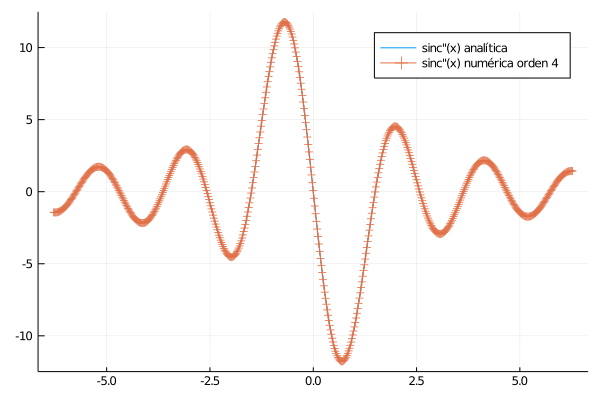

In [25]:
x=collect(-2π:0.02:2π) #intervalo de x/ el paso en este caso es 0.02
sinc=(sin.(3*x)).*(3*x.^(-1)) #definicion de sinc(x)
Dsinc= (((3*x).*(cos.(3*x))).-(sin.(3*x))).*(3*x.^(-2)); #derivada analítica de sinc(x)

y_h5 = deriv_h5(sinc,x) #derivada numérica de orden 4 de sinc(x)

println("Error con h5 =" , maximum(abs.(Dsinc-y_h5)) ) #Imprime el error máximo entre y_h5 y Dsinc

plot(x,Dsinc,label="sinc''(x) analítica") 
plot!(x,y_h5,label="sinc''(x) numérica orden 4",m=:cross)

$\therefore$ El espacio entre los puntos de la malla para que el error máximo sea menor a $10^{-5}$ para el algoritmo de 4to orden es: 0.02

### c) Realice la gráfica del “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por lo menos considere 15 puntos, es decir 15 mallas diferentes, para realizar este ejercicio.

Vamos a ver primero cuantos puntos tiene una malla x con un espaciamiento de 0.25:

In [26]:
x=collect(-2π:0.25:2π)
length(x)

51

Ahora si, para cada algoritmo vemos igual cuantos puntos tiene la malla con el espaciamiento encontrado en el inciso anteior, y después procedemos a graficar. 

**Algoritmo de orden 2**

In [27]:
x_1=collect(-2π:0.001:2π) #malla encontrada en el inciso anterior
length(x_1)

12567

Por lo tanto, partimos de 51 puntos hasta 12567.

In [28]:
num_puntos = collect(51:596:12567) #Tomamos 596 como paso porque 12567-51=12516 y 12516/596=21
#i.e. estamos considerando 21+1 (porque Julia si considera el primero) puntos para graficar.
tiempos_promedio = zeros(length(num_puntos))
for n_i in 1:length(num_puntos)
    x = collect(range(51,step=596,length=num_puntos[n_i]))
    sinc=(sin.(3*x)).*(3*x.^(-1))
    y_h3=deriv_h3(sinc,x)
    t = @benchmark deriv_h3(sinc,x)
    tiempos_promedio[n_i] = mean(t.times)
end

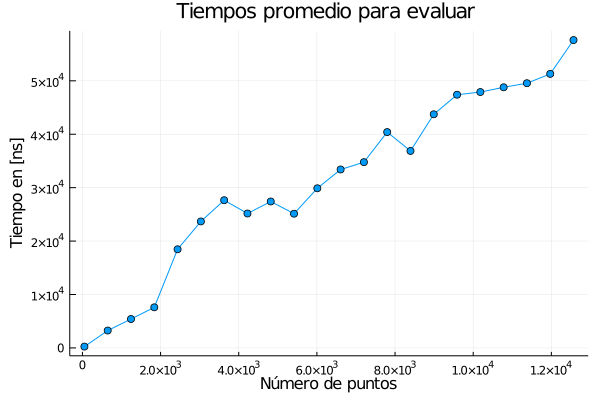

In [29]:
plot(num_puntos,tiempos_promedio,
    marker=:dot,legend=false,
    title="Tiempos promedio para evaluar ",
    xlabel="Número de puntos",ylabel="Tiempo en [ns]")

**Algoritmo de orden 4**

In [30]:
x_2=collect(-2π:0.02:2π) #malla encontrada en el inciso anterior
length(x_2)

629

Por lo tanto, partimos de 51 puntos hasta 629.

In [31]:
num_puntos = collect(51:34:629) #Tomamos 34 como paso porque 629-51=578 y 578/34=17
#i.e. estamos considerando 17+1 (porque Julia si considera el primero) puntos para graficar.
tiempos_promedio = zeros(length(num_puntos))
for n_i in 1:length(num_puntos)
    x = collect(range(51,step=34,length=num_puntos[n_i]))
    sinc=(sin.(3*x)).*(3*x.^(-1))
    y_h5=deriv_h5(sinc,x)
    t = @benchmark deriv_h5(sinc,x)
    tiempos_promedio[n_i] = mean(t.times)
end

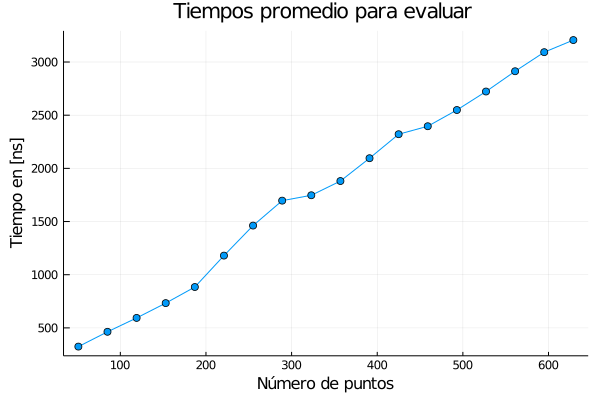

In [32]:
plot(num_puntos,tiempos_promedio,
    marker=:dot,legend=false,
    title="Tiempos promedio para evaluar ",
    xlabel="Número de puntos",ylabel="Tiempo en [ns]")

### d)  ¿Qué puede concluir de este experimento numérico?

Pudimos ver que el tiempo de ejecución en ambos algoritmos es casi el mismo, sin embargo, para el algoritmo de orden 4 necesitamos un orden de magnitud menor de espaciamiento en la malla, y por lo mismo mucho menos puntos (419 a 12567) para alcanzar un error menor a $10^{-5}$, por lo que el algoritmo de orden 4 nos ofrece mucho más precisión y se tarda la misma cantidad de tiempo en ejecutarse, razón por la que podemos decir que es mucho mejor que el algoritmo de orden 2. Por otra parte, tras realizar las gráficas del inciso anterior, observamos que el tiempo de ejecución va aumentando linealmente (aproximadamente) conforme aumenta el número de puntos en la malla, lo cual es lógico, ya que tiene sentido pensar que entre más puntos tenga, más operaciones realizará y por tanto se tardará más tiempo. 